# Importing PySpark and opening files

root
 |-- order_id: string (nullable = true)
 |-- order_item_id: integer (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: timestamp (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)

root
 |-- review_id: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- review_score: integer (nullable = true)
 |-- review_comment_title: string (nullable = true)
 |-- review_comment_message: string (nullable = true)
 |-- review_creation_date: timestamp (nullable = true)
 |-- review_answer_timestamp: timestamp (nullable = true)

root
 |-- product_id: string (nullable = true)
 |-- product_category_name: string (nullable = true)
 |-- product_name_lenght: integer (nullable = true)
 |-- product_description_lenght: integer (nullable = true)
 |-- product_photos_qty: integer (nullable = true)
 |-- product_weight_g: integer (nullable = true)
 |-- product_length_cm: int

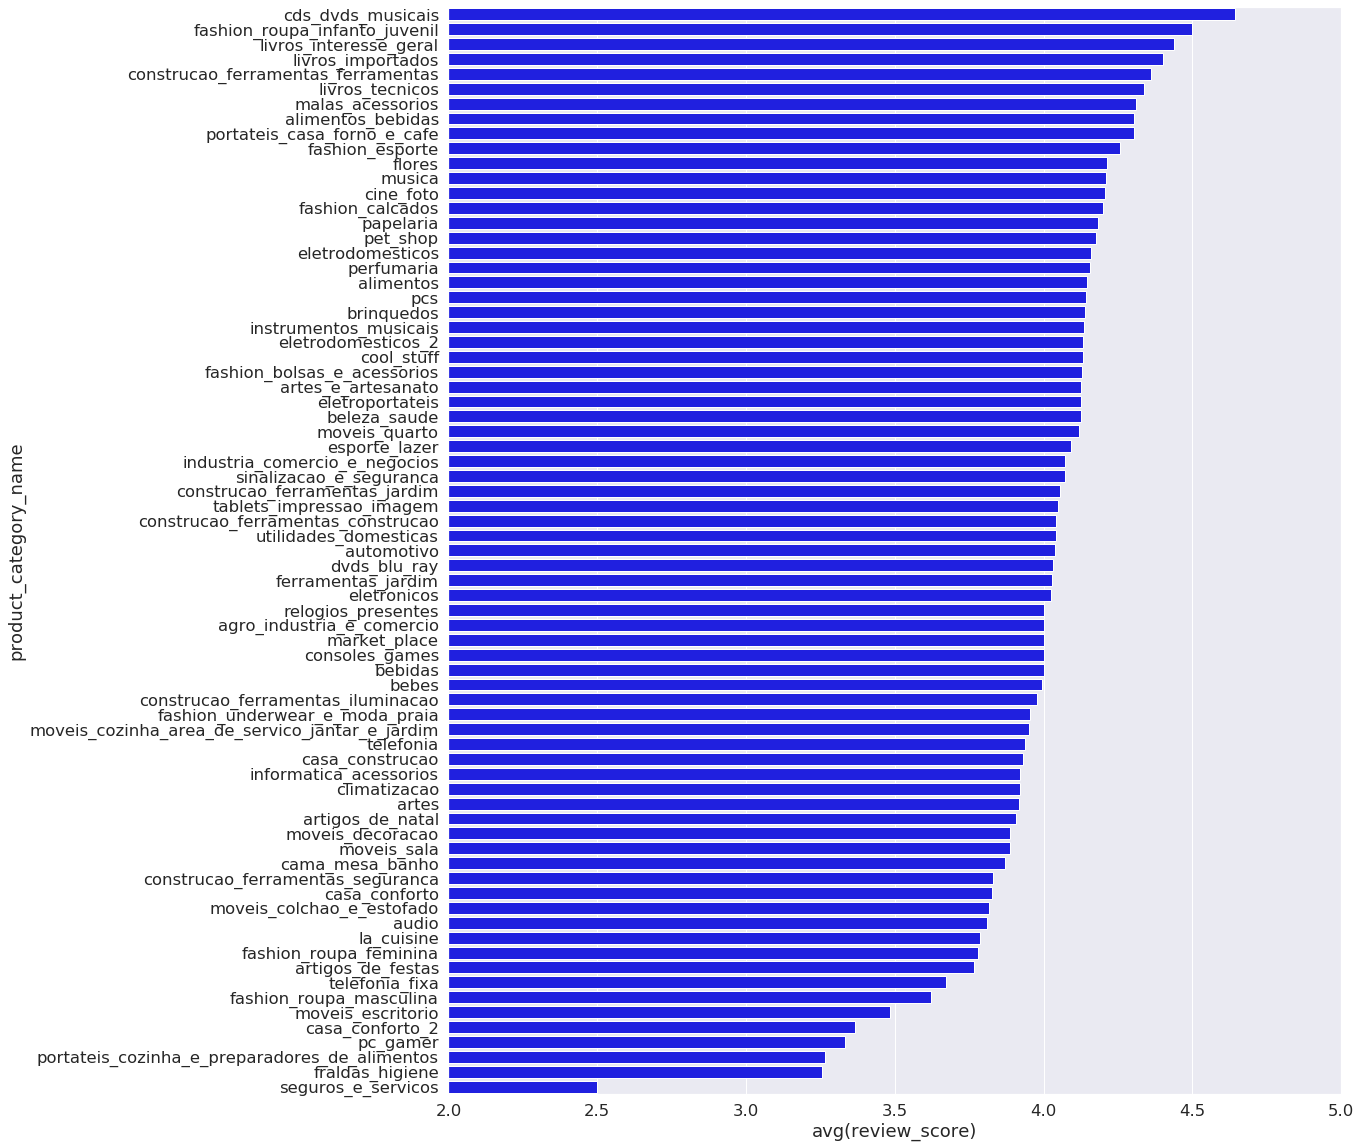

In [18]:
from pyspark.sql import SparkSession, functions as F
spark = SparkSession.builder.getOrCreate()

orders_df = spark.read \
                 .option('escape', '\"') \
                 .option('quote', '\"') \
                 .csv('./dataset/olist_order_items_dataset.csv', header=True, multiLine=True, inferSchema=True)

reviews_df = spark.read \
                  .option('escape', '\"') \
                  .option('quote', '\"') \
                  .csv('./dataset/olist_order_reviews_dataset.csv', header=True, multiLine=True, inferSchema=True)

products_df = spark.read \
                  .option('escape', '\"') \
                  .option('quote', '\"') \
                  .csv('./dataset/olist_products_dataset.csv', header=True, multiLine=True, inferSchema=True)

orders_df.printSchema()

reviews_df.printSchema()

products_df.printSchema()

orders_df = orders_df.join(reviews_df, orders_df.order_id == reviews_df.order_id) \
                     .join(products_df, orders_df.product_id == products_df.product_id) \
                     .select('product_category_name', 'review_score')
    
orders_df = orders_df.groupBy('product_category_name').agg(F.mean('review_score')).orderBy(F.desc('avg(review_score)'))

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 20))
plt.xlim(2, 5)
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
ax_0 = sns.barplot(x='avg(review_score)', y='product_category_name', data=orders_df.toPandas(), color='blue')

# Conclusion

### It's possible to conclude that there is some states where the review score average is higher or lower than other states